# Analysis of finalized models

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import seaborn as sns

## Load Models

In [3]:
base_dir = 'Trained_Models\\'

### Full grid search (25P-PCA-RFE-GS)

In [4]:
lr_grid_path = base_dir + 'lr_grid.sav'
lr_grid = joblib.load(open(lr_grid_path, 'rb'))

svc_grid_path = base_dir + 'svc_grid.sav'
svc_grid = joblib.load(open(svc_grid_path, 'rb'))

rf_grid_path = base_dir + 'rf_grid.sav'
rf_grid = joblib.load(open(rf_grid_path, 'rb'))

knn_grid_path = base_dir + 'knn_grid.sav'
knn_grid = joblib.load(open(knn_grid_path, 'rb'))

mnb_grid_path = base_dir + 'mnb_grid.sav'
mnb_grid = joblib.load(open(mnb_grid_path, 'rb'))

gbc_grid_path = base_dir + 'gbc_grid.sav'
gbc_grid = joblib.load(open(gbc_grid_path, 'rb'))

### 25P-GS

In [5]:
lr_grid_25Percentile_path = base_dir + 'lr_grid_25Percentile.sav'
lr_grid_25Percentile = joblib.load(open(lr_grid_25Percentile_path, 'rb'))

svc_grid_25Percentile_path = base_dir + 'svc_grid_25Percentile.sav'
svc_grid_25Percentile = joblib.load(open(svc_grid_25Percentile_path, 'rb'))

rf_grid_25Percentile_path = base_dir + 'rf_grid_25Percentile.sav'
rf_grid_25Percentile = joblib.load(open(rf_grid_25Percentile_path, 'rb'))

knn_grid_25Percentile_path = base_dir + 'knn_grid_25Percentile.sav'
knn_grid_25Percentile = joblib.load(open(knn_grid_25Percentile_path, 'rb'))

mnb_grid_25Percentile_path = base_dir + 'mnb_grid_25Percentile.sav'
mnb_grid_25Percentile = joblib.load(open(mnb_grid_25Percentile_path, 'rb'))

gbc_grid_25Percentile_path = base_dir + 'gbc_grid_25Percentile.sav'
gbc_grid_25Percentile = joblib.load(open(gbc_grid_25Percentile_path, 'rb'))

## Gather each classifier's range of cross-val scores

In [6]:
classifiers = [lr_grid, svc_grid, rf_grid, knn_grid, mnb_grid, gbc_grid]

classifier_names = ['Logistic Regression', 'SVC', 'Random Forest', 'K Nearest Neighbors', 
                    'Multinomial Naive Bayes', 'Gradient Boosting']

results = [clf.cv_results_['mean_test_score'] for clf in classifiers]

In [7]:
classifiers_25P = [lr_grid_25Percentile, svc_grid_25Percentile, rf_grid_25Percentile, knn_grid_25Percentile,
                   mnb_grid_25Percentile, gbc_grid_25Percentile]

results_25P = [clf.cv_results_['mean_test_score'] for clf in classifiers]

In [8]:
all_data= {} # {'Classifier': [list of crossval scores]}
for name, data in zip(classifier_names, results):
    all_data[name] = data

all_data_with_nan = dict([(k,pd.Series(v)) for k,v in all_data.items()])
df = pd.DataFrame(data=all_data_with_nan)
print(df)

    Gradient Boosting  K Nearest Neighbors  Logistic Regression  \
0            0.892593             0.964815             0.972222   
1            0.920370             0.950000             0.964815   
2            0.916667             0.922222             0.951852   
3            0.916667             0.855556             0.975926   
4            0.898148             0.720370             0.964815   
5            0.927778                  NaN             0.951852   
6            0.925926                  NaN             0.977778   
7            0.925926                  NaN             0.964815   
8            0.894444                  NaN             0.951852   
9            0.924074                  NaN             0.979630   
10           0.920370                  NaN             0.964815   
11           0.920370                  NaN             0.951852   
12           0.894444                  NaN             0.977778   
13           0.927778                  NaN             0.96481

In [9]:
all_data_25P = {} # {'Classifier': [list of crossval scores]}
for name, data in zip(classifier_names, results_25P):
    all_data_25P[name] = data

all_data_with_nan_25P = dict([(k,pd.Series(v)) for k,v in all_data_25P.items()])
df_25P = pd.DataFrame(data=all_data_with_nan_25P)

In [10]:
non_optimized_scores = [.95, # Gradient Boosting
                        .81, # KNN
                        .99, # LR
                        .95, # MNB
                        .97, # RF
                        .98] # SVC

## Boxplot showing each model's range of cross-validation scores

In [11]:
color_dict = {} # Column name : color
num_colors = df.shape[1]
colors = sns.color_palette('hls', num_colors)
color = 0

for col in df.columns.values:
    color_dict[col] = colors[color]
    color += 1

In [12]:
color_dict_25P = {} # Column name : color
num_colors = df_25P.shape[1]
colors = sns.color_palette('hls', num_colors)
color = 0

for col in df_25P.columns.values:
    color_dict_25P[col] = colors[color]
    color += 1

In [13]:
def gridsearch_boxplot(df, color_dict, non_optimized_scores):

    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    sns.boxplot(data=df, palette=color_dict, ax=ax, linewidth=0.5)

    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 10

    plt.xlabel('Classifier', fontsize=12)
    plt.ylabel('Cross Validation Score', fontsize=12)

    # Annotations for cross-val score without optimization
    x1s = [x/6 for x in range(6)]
    x2s = [(x+1)/6 for x in range(6)]

    for x1, x2, y in zip(x1s, x2s, non_optimized_scores):
        plt.axhline(y=y, xmin=x1+0.01, xmax=x2-0.01, linewidth=1.0)

    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

    output_path = r'D:\Images\Human_Tissues\GridSearch_CrossVal_Boxplot.pdf'
    fig.savefig(output_path, bbox_inches = "tight", dpi=500)
    fig.clf()

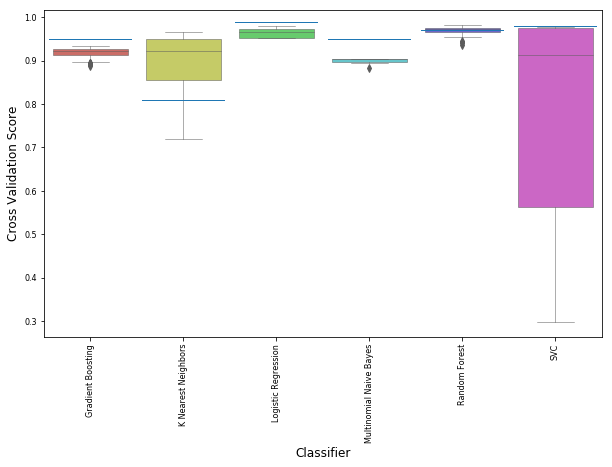

In [14]:
gridsearch_boxplot(df, color_dict, non_optimized_scores)

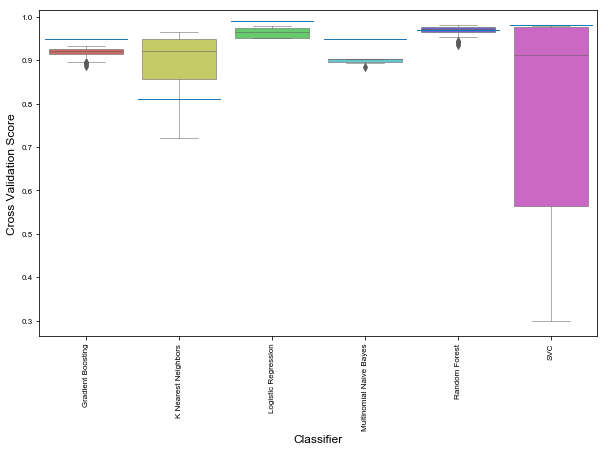

In [15]:
gridsearch_boxplot(df_25P, color_dict_25P, non_optimized_scores)

In [16]:
optimized_crossval_scores = [clf.best_score_ for clf in classifiers]
for name, score in zip(classifier_names, optimized_crossval_scores):
    print(name, ':', score)

Logistic Regression : 0.97962962963
SVC : 0.977777777778
Random Forest : 0.981481481481
K Nearest Neighbors : 0.964814814815
Multinomial Naive Bayes : 0.903703703704
Gradient Boosting : 0.933333333333
